## Gene Study Biomarker

In [17]:
import pandas as pd
train_X = pd.read_csv('/90days/s4634945/files/UntitledFolder/train_X.csv')
Gene_exp = pd.read_csv('/90days/s4634945/files/UntitledFolder/train_Y.csv')
Biomarker = Gene_exp[['CPB1']]
Biomarker = pd.DataFrame(data=Biomarker)
bins=['Low','High']
Biomarker=Biomarker.apply(lambda x: pd.qcut(x, 3,duplicates='drop', labels=False))
Cluster_img = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluster_Img_trial.csv')
train_Y = pd.merge(Gene_exp, Cluster_img, on="Sno", how="inner")
train_Y['Biomarker'] = Biomarker
train_Y=train_Y.sort_values(by=['Sno'])
#train_Y.drop(['Unnamed: 0_x'],axis=1,inplace=True)
Biomarker_cluster = train_Y['Biomarker']
train_Y= train_Y.reset_index()
train_Y.head(10)

,index,Unnamed: 0_x,Barcode,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,...,CPB1.1,KRT5,MALAT1.1,CASP8,CASP10,MAD2L2,Sno,Unnamed: 0_y,Cluster,Biomarker
0,1050,1050,CACGATTGGTCGTTAA-1,1,2,2,1,1,3,3,...,2,0,8,0,0,0,0001img,0,0,0
1,3331,3331,TCTTATGGGTAGTACC-1,2,0,4,1,2,3,1,...,4,0,14,0,0,0,0002img,1,0,0
2,2636,2636,GTATCTTGTTGCTCAC-1,3,1,2,1,2,1,2,...,5,0,21,0,0,1,0003img,2,0,1
3,1361,1361,CCTAAACAGGGTCCGT-1,2,2,3,1,2,1,3,...,4,0,21,1,0,0,0004img,3,0,0
4,953,953,CAAATGCGGAGTGTTC-1,0,0,2,5,0,4,4,...,1,0,29,0,0,0,0005img,4,0,0
5,2634,2634,GTATCTCCCTAACTGT-1,4,2,7,1,0,3,0,...,2,1,24,0,0,0,0006img,5,0,0
6,382,382,ACGTCCTAAACGAGAT-1,2,0,7,2,1,2,1,...,9,0,32,0,0,0,0007img,6,0,2
7,1800,1800,CTGCAAATGGGCTCCA-1,2,1,3,0,0,3,2,...,1,0,13,0,0,0,0008img,7,0,0
8,336,336,ACCTTTCCTTTAGAAG-1,0,0,2,3,0,1,0,...,1,0,9,0,0,0,0009img,8,0,0
9,1768,1768,CTCGGGCATCGTCGGG-1,3,1,9,3,1,2,3,...,4,0,10,0,0,1,0010img,9,1,0


In [18]:
Biomarker_cluster = Biomarker_cluster.reset_index(drop=True)
clustering = Biomarker_cluster
clustering.value_counts()

0    1428
1    1192
2    1178
Name: Biomarker, dtype: int64

In [19]:
def append_ext(fn):
    return fn+".tif"
Dataframe = pd.DataFrame()
Dataframe['Image'] = train_Y['Sno']
Dataframe['Cluster'] = train_Y['Biomarker']
Dataframe['Image']=Dataframe['Image'].apply(append_ext)
Dataframe.to_csv('/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv')

### Test Set

In [20]:
import pandas as pd
train_X = pd.read_csv('/90days/s4634945/files/UntitledFolder/test_X.csv')
Gene_exp = pd.read_csv('/90days/s4634945/files/UntitledFolder/test_Y.csv')
Biomarker = Gene_exp[['CPB1']]
Biomarker = pd.DataFrame(data=Biomarker)
bins=['Low','High']
Biomarker=Biomarker.apply(lambda x: pd.qcut(x, 3,duplicates='drop', labels=False))
Cluster_img = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluter_Img2.csv')
train_Y = pd.merge(Gene_exp, Cluster_img, on="Barcode", how="inner")
train_Y['Biomarker'] = Biomarker
train_Y=train_Y.sort_values(by=['Sno'])
#train_Y.drop(['Unnamed: 0_x'],axis=1,inplace=True)
Biomarker_cluster = train_Y['Biomarker']
train_Y= train_Y.reset_index()
train_Y.head(10)

,index,Barcode,ABCC5,ADAM15,ADAR,ADIPOR1,AEBP1,ANXA2,ANXA6,APOC1,...,Cluster,Unnamed: 0.1,x,y,Sno,left,up,right,down,Biomarker
0,1318,CCAGTGAGCTCCTTGT-1,5,1,8,5,3,5,8,41,...,1,0,3720,5534,0001img,3650,5464,3790,5604,1
1,2640,GGGTTTCCGGCTTCCA-1,4,4,5,7,6,8,7,21,...,1,1,3721,5807,0002img,3651,5737,3791,5877,1
2,0,AAACAACGAATAGTTC-1,5,6,3,4,7,4,8,21,...,2,2,3722,6080,0003img,3652,6010,3792,6150,1
3,1280,CCAAGCTTGATCTCCT-1,1,2,9,4,2,2,3,9,...,1,3,3722,6353,0004img,3652,6283,3792,6423,0
4,2168,GAGCGCTATGTCAGGC-1,4,2,7,1,5,4,4,19,...,2,4,3723,6626,0005img,3653,6556,3793,6696,0
5,1981,CTTCGTGCCCGCATCG-1,3,0,2,3,3,3,6,3,...,1,5,3724,6899,0006img,3654,6829,3794,6969,0
6,3549,TGCAAACCCACATCAA-1,4,10,13,2,5,7,4,31,...,1,6,3725,7172,0007img,3655,7102,3795,7242,0
7,2556,GGCGAGCATCGAGGAC-1,0,1,5,4,15,9,6,47,...,2,7,3726,7445,0008img,3656,7375,3796,7515,0
8,3493,TGAAACCTCAACTCAC-1,4,6,8,5,10,6,5,62,...,1,8,3727,7718,0009img,3657,7648,3797,7788,0
9,3508,TGACCCAACTCACATT-1,2,7,12,5,7,4,8,46,...,2,9,3727,7991,0010img,3657,7921,3797,8061,0


In [21]:
Biomarker_cluster = Biomarker_cluster.reset_index(drop=True)
clustering = Biomarker_cluster
clustering.value_counts()

0    1471
2    1282
1    1234
Name: Biomarker, dtype: int64

In [22]:
def append_ext(fn):
    return fn+".tif"
Dataframe = pd.DataFrame()
Dataframe['Image'] = train_Y['Sno']
Dataframe['Cluster'] = train_Y['Biomarker']
Dataframe['Image']=Dataframe['Image'].apply(append_ext)
Dataframe.to_csv('/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv')

# Gene Expression Classification and Model Interpretation by LIME

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input


In [2]:
df=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv")
df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
df['Cluster'] = df['Cluster'].astype('str')
df_test['Cluster']= df_test['Cluster'].astype('str')
datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="validation")
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_test_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32)

Found 3039 validated image filenames belonging to 3 classes.
Found 759 validated image filenames belonging to 3 classes.
Found 3987 validated image filenames belonging to 3 classes.


In [ ]:
#history = model.fit(train_generator,validation_data=valid_generator,epochs=25)
'''
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(290,290, 3), kernel_regularizer=regularizers.l2(0.02)),
        #Conv2D(16, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        #Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        #Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

    
    # Fourth convolution
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
    
    # Dense hidden layer
        Dense(64, activation='relu'),
        Dropout(0.5),
 
    # Output neuron. 
        Dense(2, activation='softmax') 
        fine_tune = model.get_layer("conv5_block1_1_conv")
for i in range(model.layers.index(fine_tune)):
    model.layers[i].trainable = False
])'''

model = InceptionV3(include_top=False, input_shape=(290,290,3), weights = "imagenet")
        
flat1 = Flatten()(model.layers[-1].output)
dense = Dense(128, activation='relu')(flat1)
drop = Dropout(0.5)(dense)
output = Dense(3, activation='softmax')(drop)
model = Model(inputs=model.inputs, outputs=output)

opt = Adam(learning_rate=0.000001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['AUC'])

history = model.fit(train_generator,validation_data=valid_generator,epochs=25)

Epoch 1/25
95/95 [==============================] - 457s 5s/step - loss: 1.4655 - auc: 0.5068 - val_loss: 1.1723 - val_auc: 0.5355
Epoch 2/25
10/95 [==>...........................] - ETA: 6:06 - loss: 1.2640 - auc: 0.5415

In [ ]:
import matplotlib.pyplot as plt
def plot_training(history):
    acc = history.history['auc']
    val_acc = history.history['val_auc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    plt.show()
    
plot_training(history)

In [11]:
from keras.preprocessing import image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        #x = inet_model.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


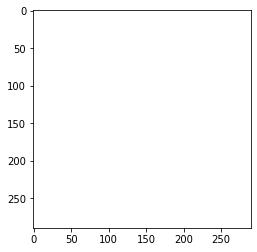

In [12]:
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0025img.tif')])

plt.imshow(images[0])
preds = model.predict(images)

In [13]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 2.54 s, sys: 322 ms, total: 2.86 s
Wall time: 9.74 s


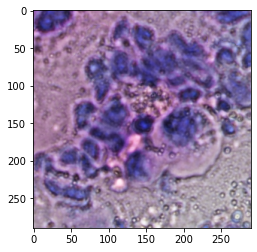

In [16]:
from PIL import Image
from matplotlib import pyplot as plt
img = Image.open('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0025img.tif')
plt.imshow(img)

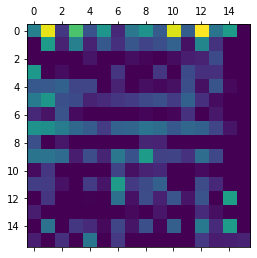

In [19]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0025img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))

with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('activation_74')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16,16))
plt.matshow(heatmap)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


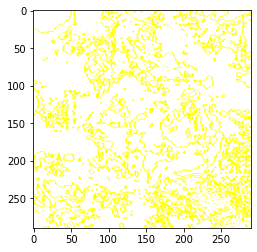

In [15]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

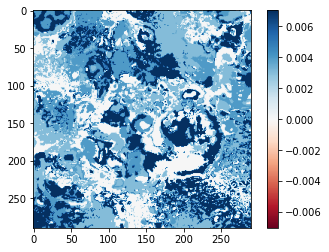

In [17]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### Spot-2

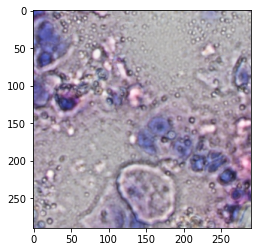

In [21]:
from PIL import Image
img = Image.open('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0026img.tif')
plt.imshow(img)

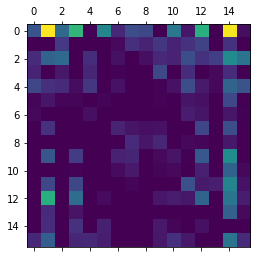

In [22]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/0026img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('activation_74')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16,16))
plt.matshow(heatmap)
plt.show()

In [25]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0026img.tif')])
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 2.27 s, sys: 177 ms, total: 2.45 s
Wall time: 1.59 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


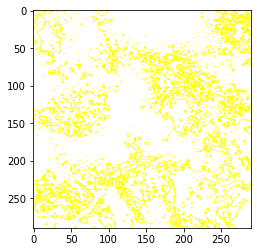

In [26]:
from skimage.segmentation import mark_boundaries
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0026img.tif')])
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=200, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

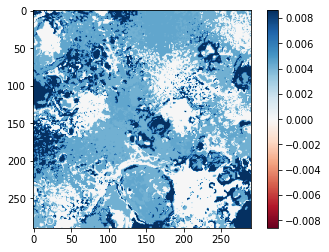

In [27]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## Spot3

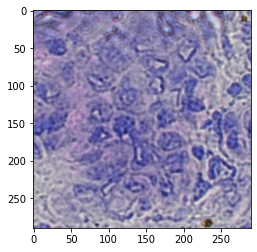

In [28]:
from PIL import Image
img = Image.open('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif')
plt.imshow(img)

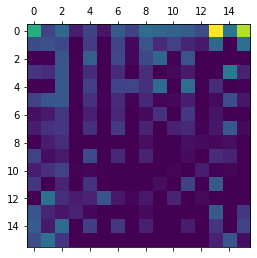

In [34]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('activation_74')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((16,16))
plt.matshow(heatmap)
plt.show()

In [35]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0026img.tif')])
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 2.65 s, sys: 79.2 ms, total: 2.73 s
Wall time: 1.98 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


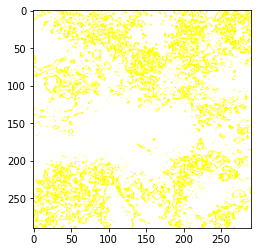

In [36]:
from skimage.segmentation import mark_boundaries
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0026img.tif')])
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=200, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

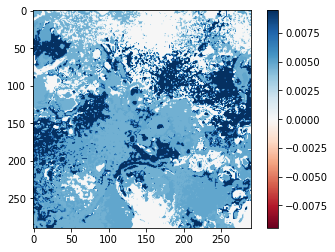

In [40]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [41]:
model.save('inception_fine_tune.h5')

# Test Set

In [42]:
print(model.evaluate(test_generator))
#from skimage import io
from tensorflow.keras.preprocessing import image
import cv2
import glob
preds = model.predict(test_generator)
test_pred = np.argmax(preds, axis=1)
#print(test_pred)
unique, counts = np.unique(test_pred, return_counts=True)
print(counts)

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


125/125 [==============================] - 91s 726ms/step - loss: 1.1017 - auc: 0.5552
[1.1017475128173828, 0.5551753044128418]
[1030  196 2761]


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

preds = model.predict(test_generator)
test_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(df_test['Cluster'].astype('int64'), test_pred)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(df_test['Cluster'].astype('int64'), test_pred)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(df_test['Cluster'].astype('int64'), test_pred, average="weighted")
print("Multiclass_roc_score")
print(multiclass_roc_score)
logloss = log_loss(df_test['Cluster'].astype('int64'), preds)
print(logloss)

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Confusion matrix

 [[1330    0    0]
 [1329    0    0]
 [1328    0    0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50      1330
           1       0.00      0.00      0.00      1329
           2       0.00      0.00      0.00      1328

    accuracy                           0.33      3987
   macro avg       0.11      0.33      0.17      3987
weighted avg       0.11      0.33      0.17      3987

Multiclass_roc_score
0.5
1.3537176421988062


/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/s4634945/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.callbacks import ModelCheckpoint
df=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_3.csv")
df_test=pd.read_csv("/90days/s4634945/files/UntitledFolder/CNN_dataframe_gene_expression_test_3.csv")
df['Cluster'] = df['Cluster'].astype('str')
df_test['Cluster']= df_test['Cluster'].astype('str')
datagen=ImageDataGenerator(validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Sharpened_1A", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=df, directory="/90days/s4634945/files/UntitledFolder/Sharpened_1A", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32, subset="validation")
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_test_299", x_col="Image", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32)

Found 3039 validated image filenames belonging to 3 classes.
Found 759 validated image filenames belonging to 3 classes.
Found 3987 validated image filenames belonging to 3 classes.


In [24]:
model = InceptionV3(include_top=False, input_shape=(290,290,3), weights = "imagenet")
flat1 = Flatten()(model.layers[-1].output)
output = Dense(3, activation='softmax')(flat1)
model = Model(inputs=model.inputs, outputs=output)
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
                             save_best_only=True, mode='auto', period=1)


opt = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['AUC'])
history = model.fit(train_generator,validation_data=valid_generator,epochs=15, callbacks=[checkpoint])

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
95/95 [==============================] - 282s 3s/step - loss: 1.2539 - auc: 0.5326 - val_loss: 1.1695 - val_auc: 0.5428

Epoch 00001: loss improved from inf to 1.20622, saving model to best_model.hdf5
Epoch 2/15
95/95 [==============================] - 255s 3s/step - loss: 1.1214 - auc: 0.6206 - val_loss: 1.2765 - val_auc: 0.5034

Epoch 00002: loss improved from 1.20622 to 1.08352, saving model to best_model.hdf5
Epoch 3/15
95/95 [==============================] - 260s 3s/step - loss: 1.0895 - auc: 0.6388 - val_loss: 1.1377 - val_auc: 0.5918

Epoch 00003: loss improved from 1.08352 to 1.06465, saving model to best_model.hdf5
Epoch 4/15
95/95 [==============================] - 261s 3s/step - loss: 1.0230 - auc: 0.6830 - val_loss: 1.2638 - val_auc: 0.5080

Epoch 00004: loss improved from 1.06465 to 1.01758, saving model to best_model.hdf5
Epoch 5/15
95/95 [==============================] - 254s 3s/step - loss: 1.0261 - auc: 0.6903 - val_loss: 1.1865 - val_auc: 0.5661

Epoch 00

In [1]:
import h5py
from keras.models import load_model 
#model.save('Inception_model_CPB1')
model = load_model("Inception_model_COX6C") 

In [2]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 290, 290, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 144, 144, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 144, 144, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 144, 144, 32) 0           batch_normalization_470[0][0]    
____________________________________________________________________________________________

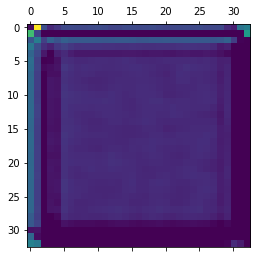

In [3]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

model = model 

img = image.load_img('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299/1000img.tif', target_size=(290,290))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#print(decode_predictions(predicted_vals[0,:]))
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('activation_497')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((33,33))
plt.matshow(heatmap)
plt.show()

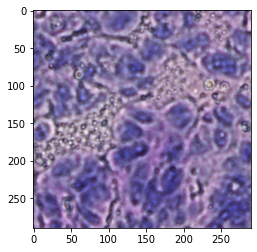

In [36]:
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0074img.tif')])
plt.imshow(images[0]/2 + 0.5)
preds = model.predict(images)

In [43]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 2.24 s, sys: 103 ms, total: 2.35 s
Wall time: 1.56 s


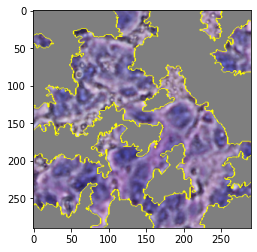

In [123]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=100, hide_rest=True)
plt.imshow(mark_boundaries(temp/2+0.5, mask))

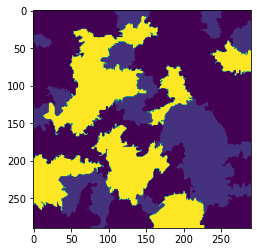

In [107]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)

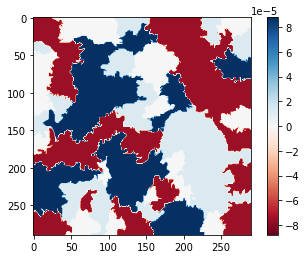

In [106]:
ind =  explanation.top_labels[2]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [105]:
plt.imsave('/90days/s4634945/files/UntitledFolder/LIME/Fibrous/High/75.png',heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())

# LIME for all images

In [ ]:
from keras.preprocessing import image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        #x = inet_model.preprocess_input(x)
        out.append(x)
    return np.vstack(out)
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299','0074img.tif')])
plt.imshow(images[0])
preds = model.predict(images)




%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)




ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

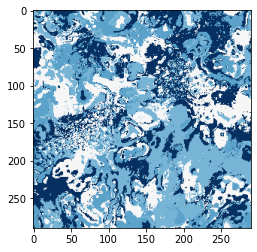

In [14]:
import PIL.Image as read
import matplotlib.pyplot as plt
img = read.open('delete.png')
plt.imshow(img)

In [26]:
from keras.applications.imagenet_utils import decode_predictions
#%%time
%load_ext autoreload
%autoreload 2
import os,sys
import lime
from lime import lime_image

im = ['0074img.tif', '0075img.tif']
sav = ['0074.png','0075.png']
for i in range(0,len(im)):
    images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/Trainimg_breast_2_299',im[i])])
    #plt.imshow(images[0])
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=3)
    dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
    #plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    #plt.colorbar()
    plt.imsave(sav[i],heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

# Tumor vs Non-Tumor

In [ ]:
'''
model = Sequential([
    # First convolution
        Conv2D(16, (4,4), activation='relu', input_shape=(290, 290,3), kernel_regularizer=regularizers.l2(0.02)),
        Conv2D(16, (4,4), activation='relu'),
        MaxPooling2D(2, 2),
    # Second convolution
        Conv2D(32, (4,4), activation='relu'),
        Conv2D(32, (4,4), activation='relu'),
        MaxPooling2D(2,2),
        #BatchNormalization(),
    # Third convolution
        Conv2D(64, (4,4), activation='relu'),
        MaxPooling2D(2,2),
        #BatchNormalization(),
    # Fourth convolution
        Conv2D(128, (4,4), activation='relu'),
        MaxPooling2D(2,2),
    # Fifth Convolution
        Conv2D(64, (4,4), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
    # Dense hidden layer
        Dense(64, activation='relu'),
        Dropout(0.5),
    # Output neuron. 
        Dense(2, activation='softmax') 
])'''

In [10]:
import pandas as pd 
train_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluster_Img_trial.csv')
train_Y['Sno'] = train_Y['Sno'].astype('str') + str(".tif")
train_Y['Cluster'] = train_Y['Cluster'].astype('str')
test_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluter_Img2.csv')
test_Y['Cluster'] = test_Y['Cluster'].replace({2:0})
test_Y = test_Y.sort_values(by='Sno')
test_Y = test_Y.reset_index(drop=True)
test_Y['Sno'] = test_Y['Sno'].astype('str') + str(".png")
test_Y['Cluster'] = test_Y['Cluster'].astype('str')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras import regularizers
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/K_2_breast_train299", 
                                            x_col="Sno", y_col="Cluster", class_mode="categorical", 
                                            target_size=(290,290), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/K_2_breast_train299", 
                                              x_col="Sno", y_col="Cluster", class_mode="categorical", 
                                              target_size=(290,290), batch_size=32, subset="validation")

In [ ]:
model = InceptionV3(include_top=False, input_shape=(290,290,3), weights = "imagenet")
flat1 = Flatten()(model.layers[-1].output)
dense = Dense(256, activation='relu')(flat1)
drop = Dropout(0.5)(dense)
output = Dense(2, activation='softmax')(drop)
model = Model(inputs=model.inputs, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,validation_data=valid_generator,epochs=5)

In [1]:
import h5py
from keras.models import load_model 
#model.save('Binary_Classification_LIME')
model = load_model("Binary_Classification_LIME") 

In [18]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(290, 290))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


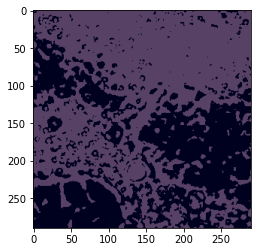

In [19]:
import os
from keras.applications.imagenet_utils import decode_predictions
images = transform_img_fn([os.path.join('/90days/s4634945/files/UntitledFolder/K_2_breast_train299','0045img.png')])
plt.imshow(images[0])
preds = model.predict(images)

In [20]:
%%time
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=2, hide_color=0, num_samples=2)

  0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 2.78 s, sys: 500 ms, total: 3.28 s
Wall time: 11 s


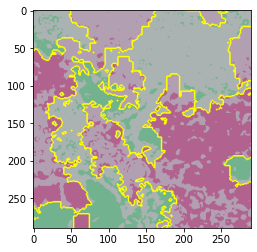

In [25]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=100, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [24]:
explanation.top_labels[0]

1

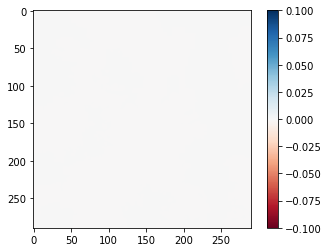

In [36]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Test Set

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
test_generator = test_datagen.flow_from_dataframe(dataframe=test_Y, directory="/90days/s4634945/files/UntitledFolder/K_2_breast_test299", x_col="Sno", y_col="Cluster", class_mode="categorical", target_size=(290,290), batch_size=32)
y_pred = model.predict(test_generator)

Found 3987 validated image filenames belonging to 2 classes.


/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [13]:
y_class = y_pred.argmax(axis=-1)
y_class

array([0, 1, 1, ..., 1, 0, 1])

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(truth, pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(test_Y['Cluster'].astype('int64'), y_class, average=average)

cm = confusion_matrix(test_Y['Cluster'].astype('int64'), y_class)
print('Confusion matrix\n\n', cm)
classifier_report = classification_report(test_Y['Cluster'].astype('int64'), y_class)
print(classifier_report)
multiclass_roc_score = multiclass_roc_auc_score(y_class, test_Y['Cluster'].astype('int64'), average="weighted")
print("Binary_roc_score")
print(multiclass_roc_score)

Confusion matrix

 [[ 617 1003]
 [ 902 1465]]
              precision    recall  f1-score   support

           0       0.41      0.38      0.39      1620
           1       0.59      0.62      0.61      2367

    accuracy                           0.52      3987
   macro avg       0.50      0.50      0.50      3987
weighted avg       0.52      0.52      0.52      3987

Binary_roc_score
0.49989555461672064


## Combined tiles Model Interpretation

In [3]:
import pandas as pd 
train_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluster_Img_trial.csv')
train_Y['Sno'] = train_Y['Sno'].astype('str') + str(".tif")
train_Y['Cluster'] = train_Y['Cluster'].astype('str')

x = list(range(0,950))
x = pd.Series(data=x)
x = x.repeat(4)
x1 = x[:3798]
x1 = x1.reset_index()
train_Y['group_by'] = x1[0]

max_per_group = train_Y
max_per_group = max_per_group.groupby(['group_by'], sort=False)['Cluster'].max()
train_Y = train_Y.iloc[::4,:].reset_index()
train_Y['Max_Cluster'] = max_per_group

train_Y['Image'] = np.arange(len(train_Y))+1
train_Y['Image'] = train_Y['Image'].astype(str)
train_Y['Image']= train_Y['Image'].str.zfill(4) + 'img.tif'
train_Y

,index,Unnamed: 0,Sno,Cluster,group_by,Max_Cluster,Image
0,0,0,0001img.tif,0,0,0,0001img.tif
1,4,4,0005img.tif,0,1,0,0002img.tif
2,8,8,0009img.tif,0,2,1,0003img.tif
3,12,12,0013img.tif,0,3,1,0004img.tif
4,16,16,0017img.tif,1,4,1,0005img.tif
...,...,...,...,...,...,...,...
945,3780,3780,3781img.tif,0,945,0,0946img.tif
946,3784,3784,3785img.tif,0,946,1,0947img.tif
947,3788,3788,3789img.tif,1,947,1,0948img.tif
948,3792,3792,3793img.tif,0,948,0,0949img.tif


In [ ]:
test_Y = pd.read_csv('/90days/s4634945/files/UntitledFolder/Cluter_Img2.csv')
test_Y['Cluster'] = test_Y['Cluster'].replace({2:0})
test_Y = test_Y.sort_values(by='Sno')
test_Y = test_Y.reset_index(drop=True)
test_Y['Sno'] = test_Y['Sno'].astype('str') + str(".tif")
test_Y['Cluster'] = test_Y['Cluster'].astype('str')

In [4]:
datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.2, featurewise_center=True,
            featurewise_std_normalization=False,
            rotation_range=90,
            horizontal_flip=True,
            vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,featurewise_center=True)
train_generator=datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_4_1200", 
                                            x_col="Image", y_col="Max_Cluster", class_mode="categorical", 
                                            target_size=(1160,1160), batch_size=32, subset="training")
valid_generator = datagen.flow_from_dataframe(dataframe=train_Y, directory="/90days/s4634945/files/UntitledFolder/Trainimg_breast_4_1200", 
                                              x_col="Image", y_col="Max_Cluster", class_mode="categorical", 
                                              target_size=(1160,1160), batch_size=32, subset="validation")

Found 760 validated image filenames belonging to 2 classes.
Found 190 validated image filenames belonging to 2 classes.


In [ ]:
model = InceptionV3(include_top=False, input_shape=(1160,1160,3), weights = "imagenet")
flat1 = Flatten()(model.layers[-1].output)
dense = Dense(256, activation='relu')(flat1)
drop = Dropout(0.5)(dense)
output = Dense(2, activation='softmax')(drop)
model = Model(inputs=model.inputs, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,validation_data=valid_generator,epochs=15)

/90days/s4634945/.conda/envs/myenv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
24/24 [==============================] - 1423s 59s/step - loss: 58.3983 - accuracy: 0.6001 - val_loss: 682953.1250 - val_accuracy: 0.6368
Epoch 2/15
24/24 [==============================] - 1436s 60s/step - loss: 4.4813 - accuracy: 0.6968 - val_loss: 211397680.0000 - val_accuracy: 0.6526
Epoch 3/15
24/24 [==============================] - 1542s 64s/step - loss: 9.5139 - accuracy: 0.6268 - val_loss: 749504.0000 - val_accuracy: 0.6421
Epoch 4/15
24/24 [==============================] - 1548s 64s/step - loss: 2.5036 - accuracy: 0.6473 - val_loss: 112353.7266 - val_accuracy: 0.6421
Epoch 5/15
24/24 [==============================] - 1541s 64s/step - loss: 1.1273 - accuracy: 0.7065 - val_loss: 18.3701 - val_accuracy: 0.6053
Epoch 6/15
24/24 [==============================] - 1535s 64s/step - loss: 0.6483 - accuracy: 0.7015 - val_loss: 2.5606 - val_accuracy: 0.6421
Epoch 7/15
24/24 [==============================] - 1526s 63s/step - loss: 0.5969 - accuracy: 0.7456 - val_loss: 1.52

# KMEANS

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2   
import glob
%matplotlib inline 

img1 = cv2.imread("/90days/s4634945/files/UntitledFolder/block1/V1_Breast_Cancer_Block_A_Section_1_image.tif")
image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

In [2]:
pixel_vals = image.reshape((-1,3)) 
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape))
#plt.imshow(segmented_image)

In [ ]:
plt.imshow(segmented_image)

In [ ]:
plt.ims